# Machine Learning
This notebook is responsible for performing regression on the data collected from the Data Collection notebook.

## Reading in the database credentials

In [1]:
db_user = ""
db_pass = ""
db_name = ""
db_host = "localhost"
with open ("database_credentials.txt") as f:
    db_user = f.readline().strip()
    db_pass = f.readline().strip()
    db_name = f.readline().strip()

## Reading in the data

In [2]:
import MySQLdb as mdb
import numpy as np
import pandas as pd

In [3]:
try:
    con = mdb.connect(host=db_host, user=db_user, passwd=db_pass, db=db_name)
    #Read data
    databases = ["streams", "categories", "streamers"]
    dfs = {}
    for i in range(len(databases)):
        sql = """
        SELECT * FROM {}
        """.format(databases[i])
        dfs[databases[i]] = pd.read_sql(sql, con)
finally:
    if con:
        con.close()
dfs["categories"]

,id,category
0,6,counter-strike: global offensive
1,7,dota 2
2,1,fortnite
3,4,grand theft auto v
4,5,hearthstone
5,8,irl
6,2,league of legends
7,10,overwatch
8,3,playerunknown's battlegrounds
9,9,world of warcraft


## Visualizing data

In [4]:
#Plotting
%matplotlib inline
import matplotlib.pyplot as plt

## Regression
Below different regressors are fit to the data in an attempt to predict the target variable, current_viewers.

In [6]:
random_state = 0

In [7]:
def safe_log(col):
    """
    Returns a safe log mapping of a pandas dataframe column log(val + 1)
    """
    return np.log(col + 1)

### Linear/quadratic single variable regressiosn
Single variable linear and quadratic regressions for predicting concurrent viewers using followers and total_views, independently, are shown below ([source](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)).

MSE: 0.663816412759
R2: 0.615832407875


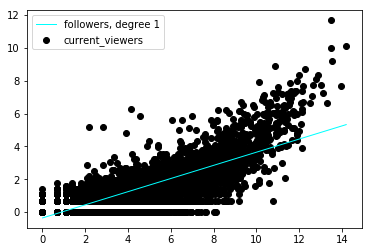

MSE: 0.663816412759
R2: 0.615832407875


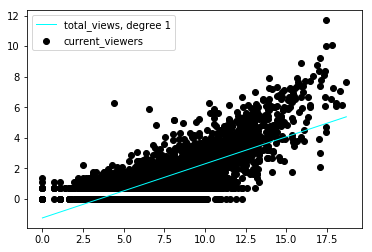

MSE: 0.663816412759
R2: 0.615832407875


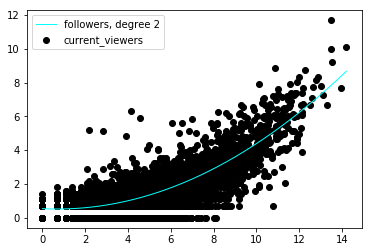

MSE: 0.663816412759
R2: 0.615832407875


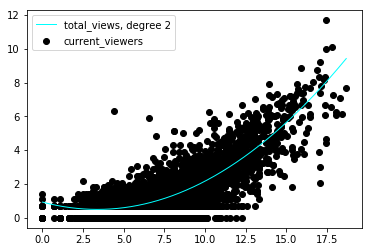

In [153]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

features = ["followers", "total_views"]
#For each degree
for i in range(2):
    degree = i + 1
    #For each feature
    for f in features:
        #Split
        x_train, x_test, y_train, y_test = train_test_split(
            safe_log(dfs["streams"][f]),
            safe_log(dfs["streams"]["current_viewers"]),
            test_size=0.8,
            random_state=random_state)
        
        #The commented out lines are equivalent for our purposes
        #x_train = x_train.values.reshape(-1, 1)
        x_train = x_train[:, np.newaxis]
        #x_test = x_test.values.reshape(-1, 1)
        x_test = x_test[:, np.newaxis]
        
        #Plotting sets
        min_xtest = min(x_test)[0]
        diff = max(x_test)[0] - min_xtest
        x_plot = np.array(
            sorted(
                [min_xtest + np.random.rand() * diff for i in range(len(x_test))])).reshape(-1, 1)
        
        #Fit
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(x_train, y_train)
        #Predict
        y_plot = model.predict(x_plot)
        #Output metrics
        print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
        print("R2: {}".format(r2_score(y_test, y_pred)))
        #Plot
        plt.scatter(x_test, y_test, color="black")
        plt.plot(x_plot, y_plot, color="cyan", linewidth=1,
                 label="{}, degree {}".format(f, degree))
        #plt.xticks(())
        #plt.yticks(())
        plt.legend(loc='top left')
        plt.show()

### Multivariate degree 1 and 2 polynomial regressions
Multivariate degree 1 and 2 polynomial regressions of the follower and total_views featureset for predicting current viewers are displayed below. [source](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

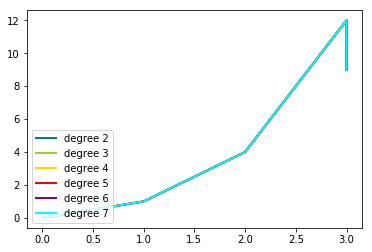

In [109]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

features = ["followers", "total_views"]
#For each degree
for i in range(2):
    degree = i + 1
    #Split
    x_train, x_test, y_train, y_test = train_test_split(
        safe_log(dfs["streams"][features]),
        safe_log(dfs["streams"]["current_viewers"]),
        test_size=0.8,
        random_state=random_state)

    #The commented out lines are equivalent for our purposes
    x_train = x_train[:, np.newaxis]
    x_test = x_test[:, np.newaxis]

    #Plotting sets
    min_xtest = min(x_test)[0]
    diff = max(x_test)[0] - min_xtest
    x_plot = np.array(
        sorted(
            [min_xtest + np.random.rand() * diff for i in range(len(x_test))]))[:, np.newaxis]

    #Fit
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, y_train)
    #Predict
    y_plot = model.predict(x_plot)
    #Output metrics
    print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
    print("R2: {}".format(r2_score(y_test, y_pred)))
    #Plot
    plt.scatter(x_test, y_test, color="black")
    plt.plot(x_plot, y_plot, color="cyan", linewidth=1,
             label="Degree {}".format(degree))
    #plt.xticks(())
    #plt.yticks(())
    plt.legend(loc='top left')
    plt.show()